<a href="https://colab.research.google.com/github/lim-jr/ESAA/blob/main/0310%EA%B8%88%EA%B3%BC%EC%A0%9C_%ED%95%B8%EC%A6%88%EC%98%A8(127_154)_%EB%B6%84%EB%A5%98.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CH3 분류

## 3.1 MNIST
* mnist데이터셋은 고등학생과 미국 인구조사국 직원들이 손으로 쓴 작은 숫자 이미지 데이터셋


In [2]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1)
mnist.keys()

/usr/local/lib/python3.9/dist-packages/sklearn/datasets/_openml.py:932: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [3]:
X, y = mnist["data"], mnist["target"]
print(X.shape)
print(y.shape)

(70000, 784)
(70000,)


* 이미지가 28x28 픽셀이기 때문에 각 이미지에는 784개의 특성이 있다. 

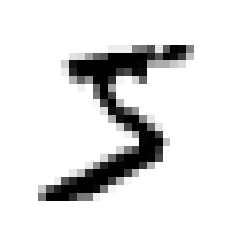

In [4]:
## 784 벡터 -> 28x28 배열

import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

#some_digit = X[0] 0번째로우
#some_digit_image = some_digit.reshape(28,28) 784개의 벡터를 28x28 행렬로 바꿔 왜오류??
some_digit = X[:1]
some_digit_image=np.array(some_digit).reshape(28,28) #이부분 설명 

plt.imshow(some_digit_image, cmap="binary")
plt.axis("off")
plt.show()

In [5]:
# 위 그림은 숫자5로 보임. 실제 레이블을 확인해보면
y[0]

'5'

In [7]:
# 레이블은 문자열임. 정수로 변환
y = y.astype(np.uint8)

In [10]:
# 데이터 스플릿
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

## 3.2 이진 분류기 훈련
* 이진분류기 
  * ex '5-감지기'는 5와 5아님 두개의 클래스를 구분함

In [11]:
y_train_5 = (y_train==5)
y_test_5 = (y_test==5)
# 5면 true이고 다른숫자는 모두 false

* 확률적 경사 하강법 분류기(SGD)
  * 매우 큰 데이터셋을 효율적으로 처리하는 장점

In [12]:
from sklearn.linear_model import SGDClassifier
sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train, y_train_5)

SGDClassifier(random_state=42)

In [14]:
# 이모델을 이용해 숫자5의 이미지를 감지
sgd_clf.predict(some_digit)

array([ True])

## 3.3 성능 측정


### 3.3.1 교차검증을 사용한 '정확도' 측정

In [35]:
# 테스트용용
type(X_train)
X_train.iloc[0:5, :]

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [42]:
# 다음은 사이킷런의 cross_val_score()함수와 같은 작업

from sklearn.model_selection import StratifiedKFold
## StratifiedKFold : 불균형한 분포도를 가진 레이블 데이터 집합을 위한 KFold 방식
from sklearn.base import clone #이게뭐냐?

skfolds = StratifiedKFold(n_splits=3, random_state=42, shuffle=True) #셔플안하면 오류

for train_index, test_index in skfolds.split(X_train, y_train_5): #skfolds.split? 계층적 샘플링?
  clone_clf = clone(sgd_clf)
  X_train_folds = X_train.iloc[train_index]
  y_train_folds = y_train_5.iloc[train_index]
  X_test_fold = X_train.iloc[test_index]
  y_test_fold = y_train_5.iloc[test_index]

  clone_clf.fit(X_train_folds, y_train_folds)
  y_pred = clone_clf.predict(X_test_fold)
  n_correct = sum(y_pred==y_test_fold) #올바른 예측수를 세어 
  print(n_correct/len(y_pred)) #정확한 예측의 비율을 출력
  

0.9669
0.91625
0.96785


In [43]:
# cross_val_score함수로 SGD모델을 평가

from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf, X_train, y_train_5, cv=3, scoring="accuracy")

array([0.95035, 0.96035, 0.9604 ])

모두 95%이상의 정확도

In [44]:
# 모든 이미지를 무조건 '5아님'클래스로 분류하는 더미분류기

from sklearn.base import BaseEstimator
class Never5Classifier(BaseEstimator):
  def fit(self, X, y=None):
    return self
  def predict(self, X):
    return np.zeros((len(X),1), dtype=bool)

In [45]:
# 위 모델의 정확도
never_5_clf = Never5Classifier()
cross_val_score(never_5_clf, X_train, y_train_5, cv=3, scoring="accuracy")

array([0.91125, 0.90855, 0.90915])

90% 이상의 정확도   
이미지의 10%정도만 숫자5이기 때문에 무조건 '5아님'으로 예측하면 정확히 맞출확률은 90%임.    
-> 이 예제는 '정확도'를 분류기의 성능측정지표로 선호하지 않는 이유를 보여준다. 특히 불균형한 데이터셋을 다룰때 더욱 그럼.

### 3.3.2 오차행렬
* 분류기의 성능을 평가하는 좋은 방법은 오차행렬을 조사하는 것임

In [46]:
# 오차행렬을 만들려면 실제 타깃과 비교할수 있도록 먼저 예측값은 만들어야

from sklearn.model_selection import cross_val_predict
y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3)
## cross_val_predict 함수는 k겹 교차검증을 수행하지만 평가점수를 반환하지 않고 각 테스트 폴드에서 얻은 에측을 반환
## 훈련세트의 모든 샘플에 대해 깨끗한 예측을 얻는다.
## 모델이 훈련하는 동안 보지 못했던 데이터에 대해 예측측

In [47]:
# 오차행렬 

from sklearn.metrics import confusion_matrix
confusion_matrix(y_train_5, y_train_pred)

array([[53892,   687],
       [ 1891,  3530]])

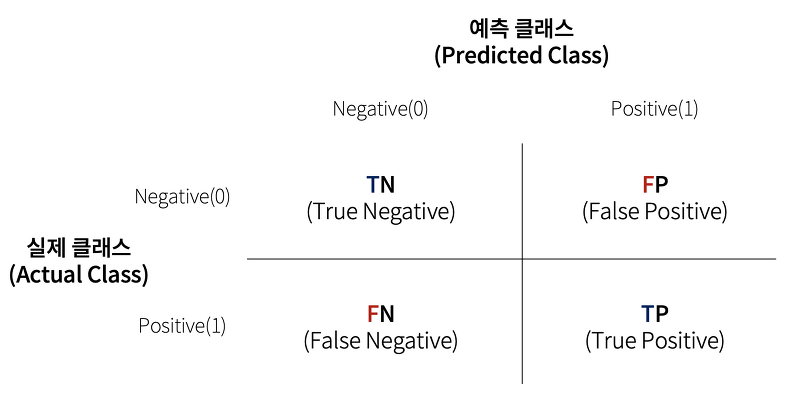

In [48]:
# 완벽한 분류기 일경우 오차행렬
y_train_perfect_predictions = y_train_5
confusion_matrix(y_train_5, y_train_perfect_predictions)

array([[54579,     0],
       [    0,  5421]])

### 3.3.3 정밀도와 재현율
* 정밀도 = TP/ TP+FP    
  * 양성으로 예측한것중에 실제 양성
  * 정밀도는 양성 예측의 정확도 
* 재현율 = TP/ TP+FN     
  * 실제양성인것 중에 양성으로잘예측
  * 재현율은 분류기가 정확히 감지한 양성샘플의 비율


In [50]:
from sklearn.metrics import precision_score, recall_score
print(precision_score(y_train_5, y_train_pred))
print(recall_score(y_train_5, y_train_pred))

0.8370879772350012
0.6511713705958311


* f1스코어 : 정밀도와 재현율의 조화평균

In [52]:
from sklearn.metrics import f1_score
f1_score(y_train_5, y_train_pred)

0.7325171197343846

### 3.3.4 정밀도/재현율 트레이드오프


In [57]:
y_scores = sgd_clf.decision_function(some_digit) #각 샘플의 점수
y_scores
threshold = 0 #임계값
y_some_digit_pred = (y_scores>threshold)

In [58]:
threshold = 8000
y_some_digit_pred = (y_scores>threshold)
y_some_digit_pred

array([False])

이 결과는 임계값을 높이면 재현율이 줄어든다는 것을 보여줌     

In [59]:
## 적절한 임계값 구하기

y_scores = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3, method="decision_function") 
#훈련셋에 있는 모든 샘플의 점수 구하기
#예측결과가 아니라 결정점수를 반환

#모든 임계값에 대해 정밀도와 재현율 계산
from sklearn.metrics import precision_recall_curve
precisions, recalls, thresholds = precision_recall_curve(y_train_5, y_scores)


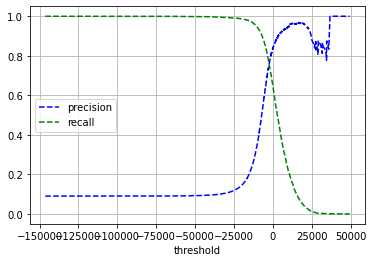

In [60]:
# 맷플로립 이용해 임계값의 함수로 정밀도와 재현율 그리기
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
  plt.plot(thresholds, precisions[:-1], "b--", label="precision")
  plt.plot(thresholds, recalls[:-1], "g--", label="recall")
  plt.legend()
  plt.xlabel('threshold')
  plt.grid()

plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.show()

#임계값을 올리더라도 정밀도가 가끔 낮아질 때가 있기 때문에 정밀도 곡선이 재현율 곡선보다 더 울퉁불퉁함

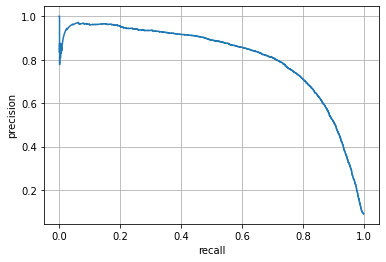

In [61]:
# 재현율에 대한 정밀도 곡선
plt.plot(recalls[:-1], precisions[:-1])
plt.xlabel('recall')
plt.ylabel('precision')
plt.grid()
plt.show()

재현율 80% 근처에서 정밀도가 급격히 줄어들기 시작   
이 하강점 직전을 정밀도/재현율 트레이드오프로  선택하는 것이 좋다.    
예를 들면 재현율 60%정도인 지점    
프로젝트에 따라 달라짐     


In [64]:
## 정밀도 90%를 달성하는 것이 목표라고 가정
# -> 임곗값 약 8000, 최소한 90% 정밀도가 되는 가장 낮은 임곗값

threshold_90_precision = thresholds[np.argmax(precisions>=0.9)]
threshold_90_precision

3370.019499143958

In [65]:
y_train_pred_90 = (y_scores>=threshold_90_precision)

#정밀도
precision_score(y_train_5, y_train_pred_90)

0.9000345901072293

In [66]:
#재현율
recall_score(y_train_5, y_train_pred_90)

0.4799852425751706

### 3.3.5 ROC 곡선
* 수신기 조작 특성(ROC) 곡선
* 진짜양성비율(TPR 재현율)에 대한 거짓양성비율(FPR)의 곡선 
  * FPR : 양성으로 잘못 분류된 음성샘플의 비율
  * TNR : 음성으로 정확히 분류된 음성샘플의 비율, 특이도
  * 1-TNR = FPR
  * 즉, ROC곡선은 TPR(재현율)에 대한 1-TNR(1-특이도)의 그래프프

In [67]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_train_5, y_scores)

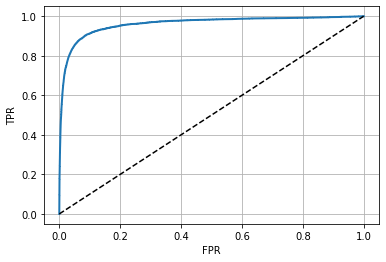

In [70]:

def plot_roc_curve(fpr, tpr, label=None):
  plt.plot(fpr, tpr, linewidth=2, label=label)
  plt.plot([0,1], [0,1], 'k--')
  plt.xlabel('FPR')
  plt.ylabel('TPR')
  plt.grid()

plot_roc_curve(fpr, tpr)
plt.show()

* 점선은 완전한 랜덤분류기의 ROC곡선을 뜻함
* 좋은 분류기는 점섬에서 최대한 멀리 떨어져 있어야


#### 곡선 아래 면적(AUC)을 측정하면 분류기 비교 가능
  * 완벽한 분류기의 ROC의 AUC는 1, 완전한 랜덤 분류기의 ROC의 AUC는 0.5 
  * 0.5<AUC<1 1로갈수록 좋음

In [ ]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_train_5, y_scores)

#### rf_clf를 훈련시켜 SGDclf의 ROC곡선과 ROC AUC 점수를 비교


In [74]:
from sklearn.ensemble import RandomForestClassifier
rf_clf = RandomForestClassifier(random_state=42)
y_probas_rf = cross_val_predict(rf_clf, X_train, y_train_5, cv=3, method="predict_proba")
#rf에는 훈련셋의 샘플에 대한 점수를 얻는 decision_fun없어서 predicit_proba를 이용
#predict_proba는 샘플이 행, 클래스가 열이고 샘플이 주어진 클래스에 속한 확률을 담은 배열

In [75]:
y_scores_rf = y_probas_rf[:,1] #양성클래스에 대한 확률을 점수로 사용
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_train_5, y_scores_rf)

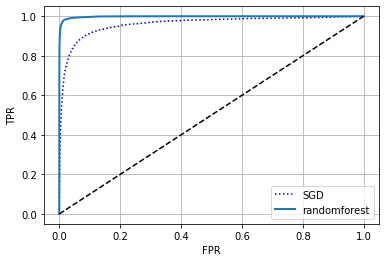

In [77]:
#ROC 곡선
plt.plot(fpr, tpr, "b:", label="SGD")
plot_roc_curve(fpr_rf, tpr_rf, "randomforest")
plt.legend(loc="lower right")
plt.show()

In [78]:
roc_auc_score(y_train_5, y_scores_rf)

0.9983436731328145

* randomforet분류기가 SGD분류기보다 좋음
* roc_auc 점수도 더 높다.

## 3.4 다중 분류
* 다중분류기는 둘 이상의 클래스를 구별
* OvR : 예를 들어 특정 숫자 하나만 구분하는 숫자별 이전분류기 10개를 훈련시켜 클래스가 10개인 숫자 이미지 분류 시스템을 만들 수 있다.
* OvO : 0,1구별/ 0,2구별/ 1,2구별 등과 같이 각 숫자의 조합마다 이진 분류기를 훈련시킴
* 로지스틱 회귀, 서포트 벡터 머신 분류기 같은 알고리즘은 이진 분류만 가능

* 하지만 이진 분류기를 여러 개 사용해 다중 클래스를 분류하는 기법도 많다! OvR, OvA, OvO

* 다중 클래스 분류 작업에 이진 분류 알고리즘을 선택하면 사이킷런이 알고리즘에 따라 자동으로 OvR, OvO 실행




In [79]:
from sklearn.svm import SVC #이게뭐냐
svm_clf = SVC()
svm_clf.fit(X_train, y_train)
svm_clf.predict(some_digit)

array([5], dtype=uint8)

In [80]:
some_digit_scores = svm_clf.decision_function(some_digit)
some_digit_scores 
#decision_fun메서드를 호출하면 샘플당 10개의 점수를 반환

array([[ 1.72501977,  2.72809088,  7.2510018 ,  8.3076379 , -0.31087254,
         9.3132482 ,  1.70975103,  2.76765202,  6.23049537,  4.84771048]])

In [81]:
np.argmax(some_digit_scores)
# 가장 높은 점수는 클래스5

5

In [82]:
svm_clf.classes_

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [ ]:
# OvO나 OvR을 사용하도록 강제하려면 
from sklearn.multiclass import OneVsRestClassifier
ovr_clf = OneVsRestClassifier(SVC())
ovr_clf.fit(X_train, y_train)
ovr_clf.predict(some_digit)

In [ ]:
# SGD분류기는 다중클래스로 분류할 수 있기 때문에 별도적용x
sgd_clf.decision_function(some_digit)

In [ ]:
cross_val_score(sgd_clf, X_train, y_train, cv=3, scoring="accuracy")

모든 테스트 폴드에서 84%이상을 얻음.   

In [85]:
# 간단하게 입력의 스케일을 조정하면 정확도를 높일수
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.astype(np.float64))
cross_val_score(sgd_clf, X_train_scaled, y_train, cv=3, scoring="accuracy")

KeyboardInterrupt: ignored

## 3.5 에러분석
* 모델의 성능을 향상 시킬 방법-> 에러 종류 분석

In [84]:
y_train_pred=cross_val_predict(sgd_clf, X_train_scaled, y_train, cv=3)
conf_mx=confusion_matrix(y_train, y_train_pred)
conf_mx

NameError: ignored

In [ ]:
#이미지로 포현
plt.matshow(conf_mx,cmap=plt.cm.gray)
plt.show()

In [ ]:
#에러 비율 비교
row_sums=conf_mx.sum(axis=1, keepdims=True)
norm_conf_mx= conf_mx/row_sums

#주대각선만 0으로 채워서 그래프 그리기
np.fill_diagonal(norm_conf_mx,0)
plt.matshow(norm_conf_mx,cmap=plt.cm.gray)
plt.show()

* 8열이 밝으므로 많은 이미지가 잘못 8로 분류되었음, 개선필요

In [ ]:
# 3,5의 샘플의 경우, 두 숫자를 모델이 쉽게 혼동동
cl_a, cl_b=3,5
X_aa=X_train[(y_train ==cl_a)&(y_train_pred==cl_a)]
X_ab=X_train[(y_train ==cl_a)&(y_train_pred==cl_b)]
X_ba=X_train[(y_train ==cl_b)&(y_train_pred==cl_a)]
X_bb=X_train[(y_train ==cl_b)&(y_train_pred==cl_b)]

plt.figure(figsize=(8,8))
plt.subplot(221); plot_digits(X_aa[:25], images_per_row=5)
plt.subplot(222); plot_digits(X_ab[:25], images_per_row=5)
plt.subplot(223); plot_digits(X_ba[:25], images_per_row=5)
plt.subplot(224); plot_digits(X_bb[:25], images_per_row=5)
plt.show()

* 3,5에러를 줄이는 방법은   
  이미지를 중앙에 위치키시고 회전되어 있지 않도록 전처리

## 3.6 다중레이블 분류
* 지금까지는 각 샘플이 하나의 클래스에만 할당
* 그러나 분류기가 샘플마다 여러개의 클래스를 출력해야할때도 있다.
* 다중레이블 분류 : 여러개의 이진 꼬리표를 출력하는 분류시스템

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

#각 숫자 이미지에 두 개의 타겟 레이블이 담긴 y_multilabel 배열을 만듦
y_train_large=(y_train>=7) #숫자가 큰 값 (7,8,9)인지 나타냄
y_train_odd=(y_train%2==1) #홀수인지 나타냄
y_multilabel=np.c_[y_train_large,y_train_odd] 

knn_clf=KNeighborsClassifier()
knn_clf.fit(X_train, y_multilabel) #다중타깃배열을 사용하여 훈련련

In [ ]:
knn_clf.predict(some_digit)

* 올바르게 분류
* 숫자5는 7보다 크지 않고, 홀수임


In [ ]:
#다중 레이블 분류기 평가 방법 중 1-> F1score의 평균 계산
y_train_knn_pred=cross_val_predict(knn_clf, X_train, y_multilabel, cv=3)
f1_score(y_multilabel, y_train_knn_pred, average="macro")